In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from scipy.stats import gaussian_kde

In [36]:
sub_id ="0013"

project_path =  Path("/projects/MINDLAB2021_MEG-CerebellarClock-FuncSig")
filepath = project_path / "scratch" / "respiration" / f"{sub_id}" /  f"{sub_id}_phase_angles_events.csv"


df = pd.read_csv(filepath)

In [37]:
event_ids = dict(
    s1=3, s2=5, s3=9,
    s4_0=19, s5_0=21, s6_0=25,
    s4_15=35, s5_15=37, s6_15=41,
    w0_hit=337, w15_hit=353,
    o0_cr=400, o15_cr=416,
    w0_miss=593, w15_miss=609,
    o0_fa=656, o15_fa=672
    )

# inverting the dictionary so the keys are the numbers and the values are the event types
inverse_event_ids = {v: k for k, v in event_ids.items()}


df['event_type'] = df['trigger'].map(inverse_event_ids)

In [38]:
print(df["event_type"].unique())

['s1' 's2' 's3' 's4_0' 's5_0' 's6_0' 'w0_hit' 'o0_cr' 's4_15' 's5_15'
 's6_15' 'o15_cr' 'w15_hit' 'o0_fa' 'w0_miss' 'w15_miss' 'o15_fa']


In [39]:
hits  = df[df['event_type'].str.contains("hit", na=False)]
misses = df[df['event_type'].str.contains("miss", na=False)]
print(misses)

      phase_angle  trigger  sample event_type
90      -2.428794      593  106180    w0_miss
328     -2.759138      609  148287   w15_miss
363     -2.610989      593  156108    w0_miss
433     -0.373999      593  168251    w0_miss
517      0.278690      609  182623   w15_miss
594      1.408300      593  197062    w0_miss
629      2.101848      593  203123    w0_miss
657     -0.854513      593  208196    w0_miss
797      1.381410      609  235420   w15_miss
839      1.467793      609  242550   w15_miss
930     -1.329135      609  259499   w15_miss
937      1.706544      593  260720    w0_miss
1175     2.441102      593  303951    w0_miss
1182    -1.464991      609  305185   w15_miss
1217    -2.249535      609  311067   w15_miss
1259     2.523368      593  319282    w0_miss
1434    -3.083772      593  351044    w0_miss
1497     0.122400      593  361665    w0_miss


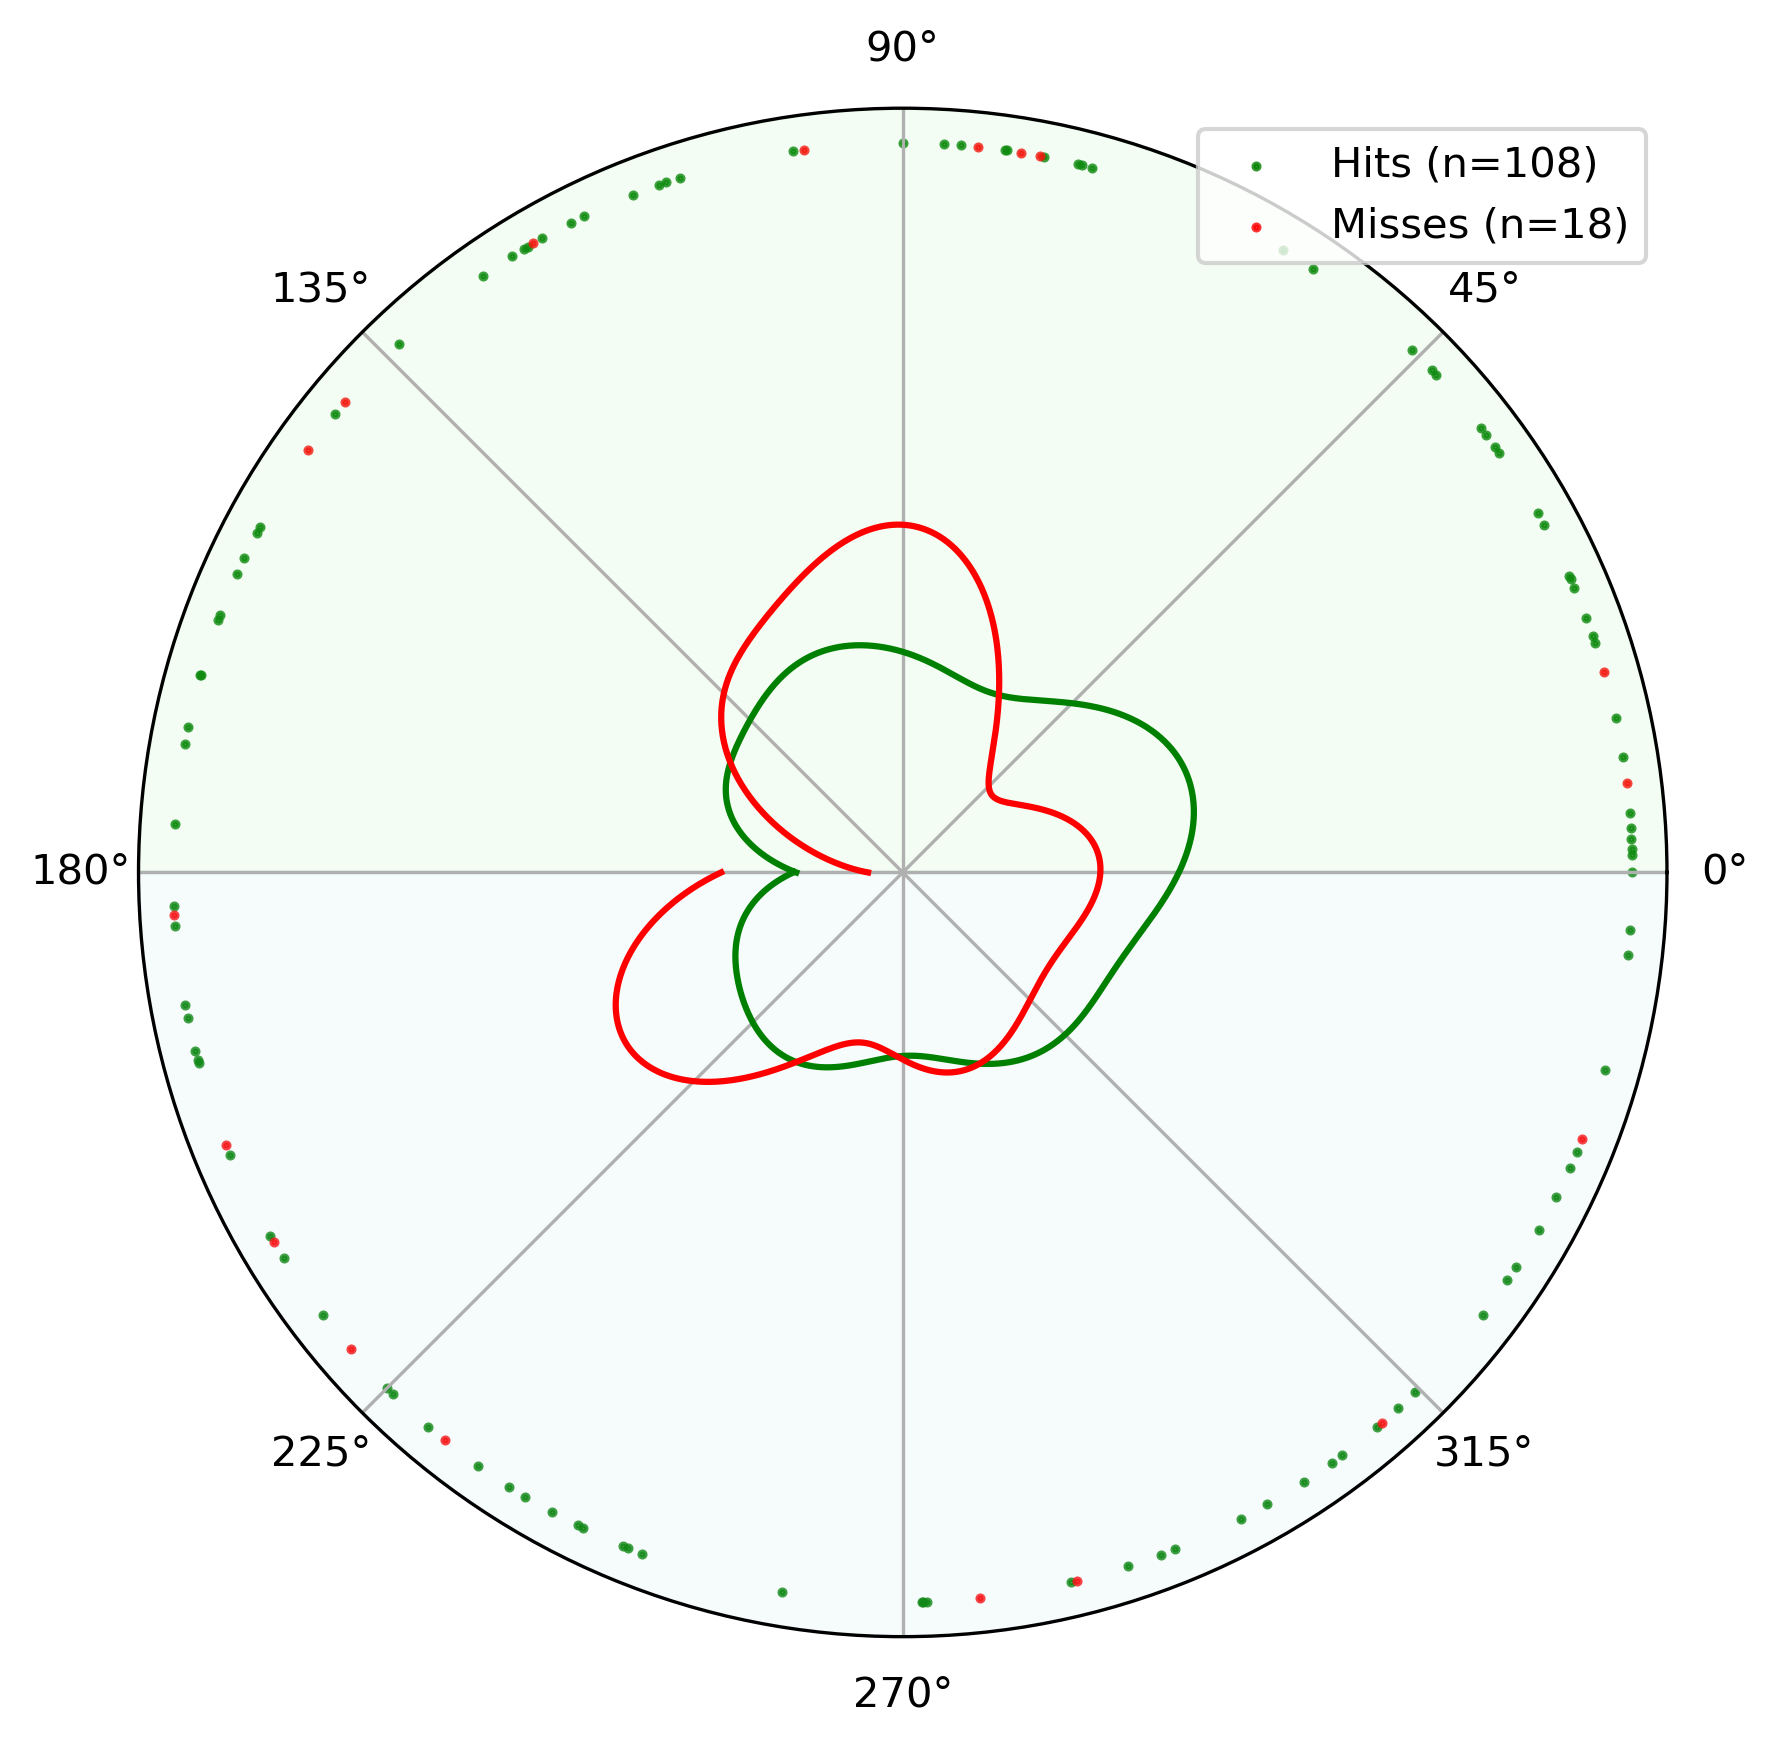

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (6,6), dpi = 300, subplot_kw={'projection': 'polar'})
ax.set_rticks([])  # no radial ticks

ax.scatter(hits["phase_angle"], [0.5]*len(hits), s = 2, alpha = 0.8, color = "green", label = f"Hits (n={len(hits)})")

density = gaussian_kde(hits["phase_angle"], bw_method=0.2)
xs = np.linspace(-np.pi, np.pi, 1000)
ax.plot(xs, density(xs), color = "green")

ax.scatter(misses["phase_angle"], [0.5] * len(misses), s = 2, alpha = 0.8, color = "red", label = f"Misses (n={len(misses)})")
try:
    density = gaussian_kde(misses["phase_angle"], bw_method=0.2)    
    xs = np.linspace(-np.pi, np.pi, 1000)
    ax.plot(xs, density(xs), color = "red")

except: 
    pass
ax.axvspan(0, np.pi, color="lightgreen", alpha=0.1)
ax.axvspan(0, -np.pi, color="lightblue", alpha=0.1)

ax.legend(loc = "upper right")
plt.tight_layout()

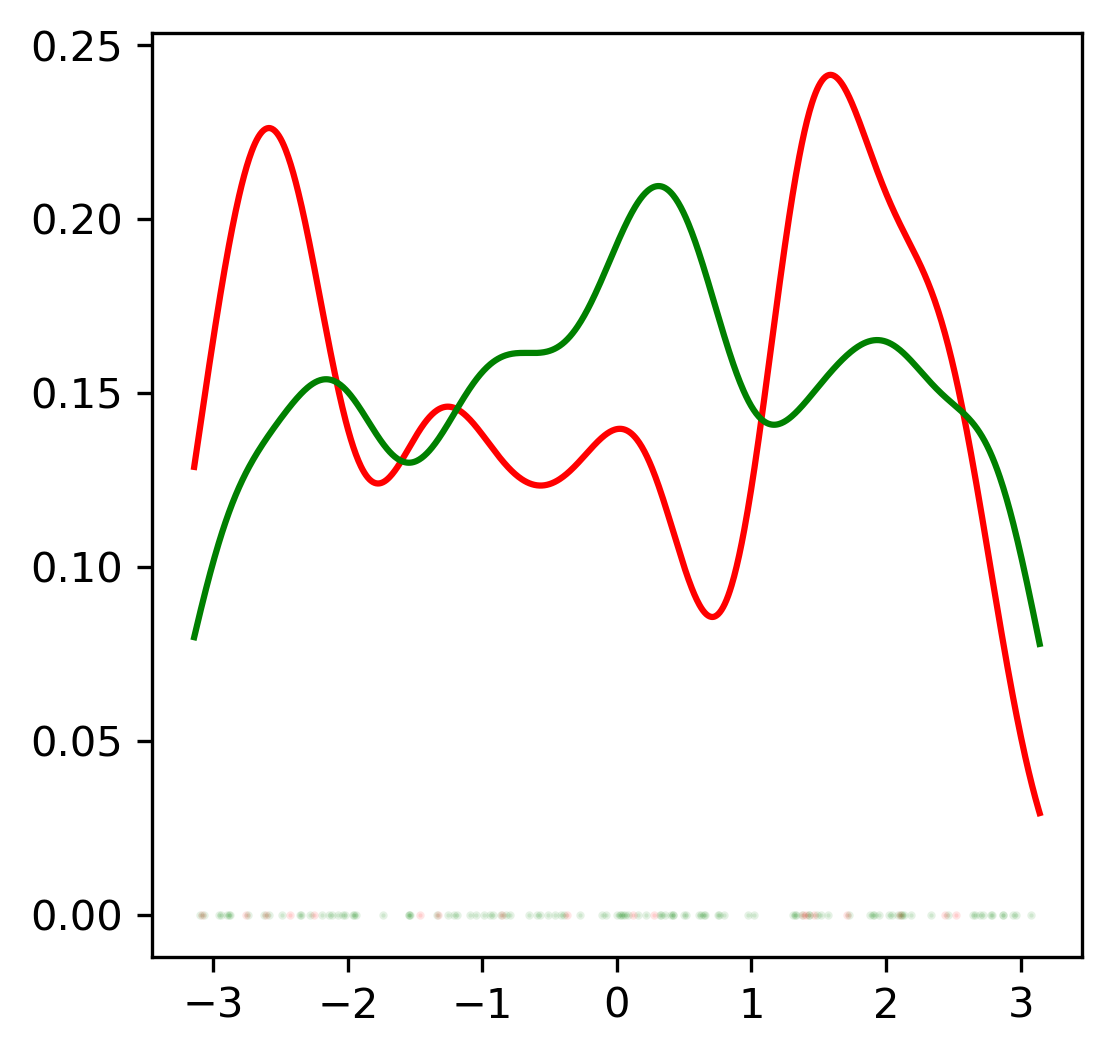

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (4,4), dpi = 300)
ax.scatter(hits["phase_angle"], [0]*len(hits), s = 1, alpha = 0.1, color = "green")
ax.scatter(misses["phase_angle"], [0]*len(misses), s = 1, alpha = 0.1, color = "red")


density = gaussian_kde(misses["phase_angle"], bw_method=0.2)
ax.plot(np.linspace(-np.pi, np.pi, 1000), density(xs), label ="Misses", color = "red")

density = gaussian_kde(hits["phase_angle"], bw_method=0.2)
ax.plot(np.linspace(-np.pi, np.pi, 1000), density(xs), label ="Hits", color = "green")


In [125]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

theta

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 ,  2.07345115,  2.136283  ,
        2.19911486,  2.26194671,  2.32477856,  2.38761042,  2.45044227,
        2.51327412,  2.57610598,  2.63893783,  2.70176968,  2.76460154,
        2.82743339,  2.89026524,  2.95309709,  3.01592895,  3.0787608 ,
        3.14159265,  3.20442451,  3.26725636,  3.33008821,  3.39292007,
        3.45575192,  3.51858377,  3.58141563,  3.64424748,  3.70707933,
        3.76991118,  3.83274304,  3.89557489,  3.95840674,  4.0212386 ,
        4.08407045,  4.1469023 ,  4.20973416,  4.27256601,  4.33